
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E05_KNN.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# K-Nearest Neighbor classification (KNN) exercises 

---
These are introductory exercises in Machine learning with focus in **KNN**, but also an introductory exercise in computer vision.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.datasets.mnist.load_data``` and read to find out how to unpack the data properly. 

In [58]:
# Importera Keras från TensorFlow
from tensorflow import keras


In [59]:
# Ladda MNIST-datasetet
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


In [60]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
   

## 0. MNIST data (*)
&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

In [61]:
"""
I det givna stycket beskrivs formen på datan som laddats från MNIST-datasetet. 
X_train och X_test representerar bilderna i tränings- och testdataseten,
 med formen (60000, 28, 28) och (10000, 28, 28) respektive. Det innebär att träningsdatasetet
innehåller 60 000 bilder, med varje bild som är 28x28 pixlar, medan testdatasetet innehåller 
10 000 bilder av samma storlek. Å andra sidan, y_train och y_test innehåller etiketterna för
bilderna i motsvarande dataset. Deras form är (60000,) och (10000,), vilket betyder att det finns
60 000 etiketter i träningsdatasetet och 10 000 etiketter i testdatasetet. 
Varje etikett representerar en enda siffra."""

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


## 0. MNIST data (*)
&nbsp; c) How many images are there in X_train?

In [62]:
num_images_in_X_train = len (X_train)
print("Number of images in X_train:", num_images_in_X_train)

Number of images in X_train: 60000


## 0. MNIST data (*)
&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

In [63]:
import matplotlib.pyplot as plt

#Picture
picture = X_train [3]
smallest_value = picture.min()
largest_value = picture.max()
print("Smallest value in the picture choosen:", smallest_value)
print("Largest value in the picture choosen:", largest_value)

    


Smallest value in the picture choosen: 0
Largest value in the picture choosen: 255


## 0. MNIST data (*)
&nbsp; e) Plot 20 sample images. 

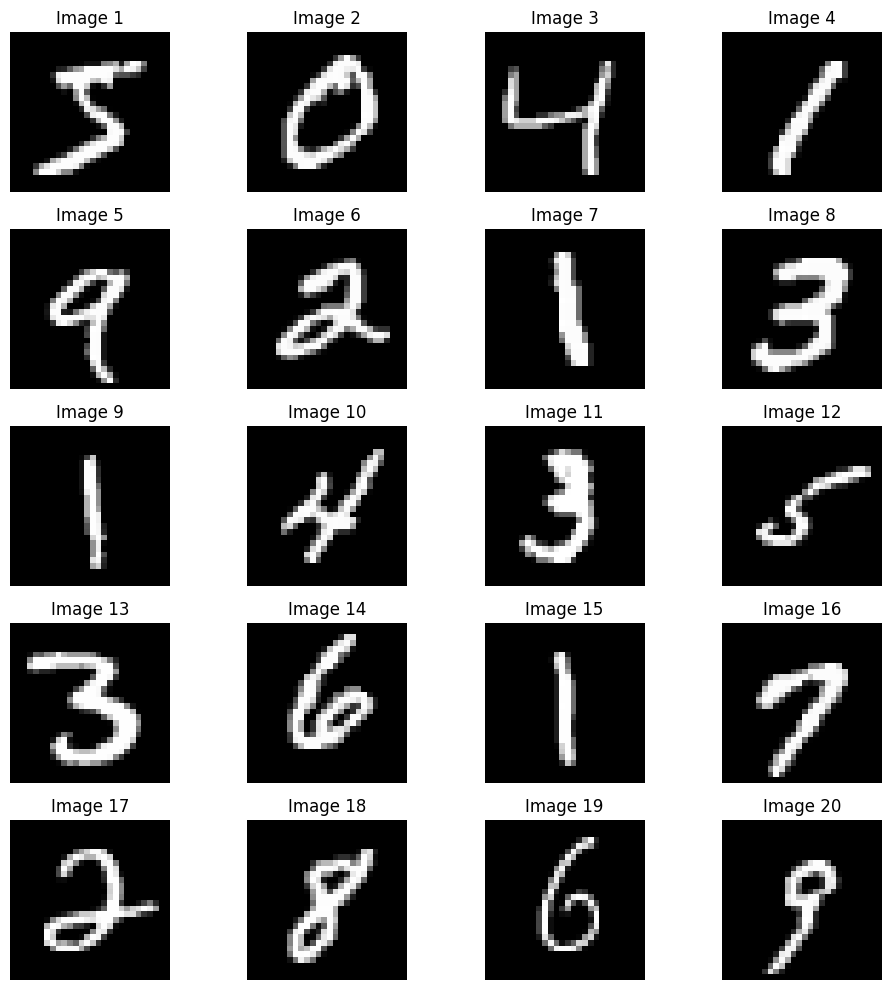

In [64]:
#import matplotlib.pyplot as plt

#Size
fig, axes = plt.subplots(5, 4, figsize = (10, 10))

# Flattena arrayen av axlar för enklare indexering
axes = axes.flatten()

# Loopa igenom 20 exempelbilder och plotta dem
for i in range(20):
    # Välj en bild från X_train (till exempel den första bilden)
    sample_image = X_train[i]
    
    # Plotta bilden på den aktuella axeln
    axes[i].imshow(sample_image, cmap="gray")
    axes[i].axis("off")  # Ta bort axlar
    axes[i].set_title(f"Image {i+1}")

# Justera layouten för att förbättra utseendet
plt.tight_layout()
plt.show()


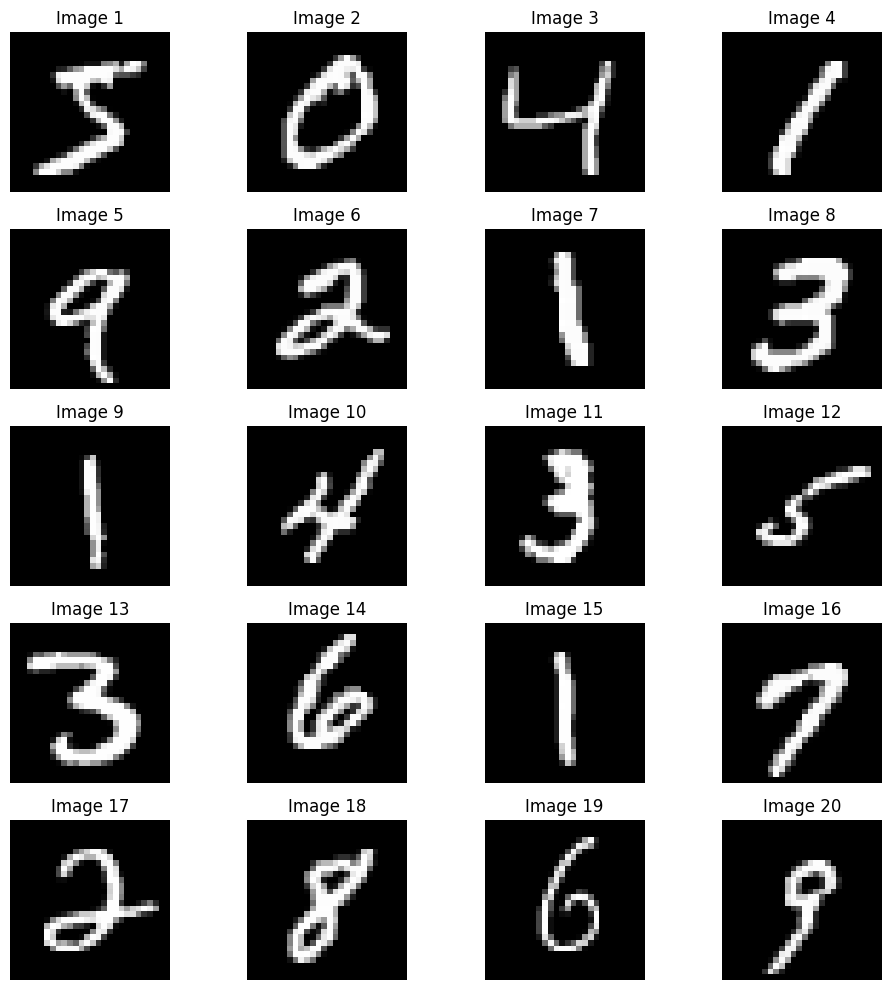

In [65]:
import matplotlib.pyplot as plt

# Välj de första 20 bilderna från X_train
sample_images = X_train[:20]

# Skapa en subplot-rutnät med 5 rader och 4 kolumner
fig, axes = plt.subplots(5, 4, figsize=(10, 10))

# Plotta varje bild i subplot-rutnätet
for i, ax in enumerate(axes.flat):
    # Plotta bilden på den aktuella axeln
    ax.imshow(sample_images[i], cmap="gray")
    ax.axis("off")  # Ta bort axlar
    ax.set_title(f"Image {i+1}")

# Justera layouten för att förbättra utseendet
plt.tight_layout()
plt.show()

## 0. MNIST data (*)
&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

In [66]:
# X_train and X_test til 2D tensors
X_train_reshaped= X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

#Check new shapes
print("New shapes of X_train:", X_train_reshaped.shape)
print ("New shape of X_test:", X_test_reshaped.shape)


New shapes of X_train: (60000, 784)
New shape of X_test: (10000, 784)



<details>

<summary>Hint</summary>

e) A vector or a 1D array can represent one image. 

</details>

<details>

<summary>Answer</summary>

d) 0 and 255. It's grayscale images of 28x28 pixels, where the higher the value, the larger pixel intensity.

<img src = "../assets/MNIST_samples.png" height=100>

e) Shape: X_train: (60000, 784), X_test: (10000, 784)

</details>

---

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

---

In [67]:
from sklearn.model_selection import train_test_split


#validation size
validation_sizesize = 10000
test_size = 0.16 #Nära 1/6 för att få cirka 10000 valideringsprover


# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=test_size, random_state =42)


# Check the size of the new sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (50400, 784)
Shape of X_val: (9600, 784)
Shape of y_train: (50400,)
Shape of y_val: (9600,)


## 2. Hyperparameter tuning (*)

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 

<details>

<summary>Answer</summary>

<img src = "../assets/Tune k in KNN MNIST.png" height=300>

</details>

---

In [74]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Anta att X_train, y_train, X_val, y_val är definierade

# Define a range of k values
k_values = range(1, 21)

# Initialize lists to store validation accuracies
validation_accuracies = []

# Loop through each k value
for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on validation data
    y_pred = knn.predict(X_val)
    
    # Calculate validation accuracy
    accuracy = np.mean(y_pred == y_val)
    validation_accuracies.append(accuracy)

# Plot validation accuracy against different k values
plt.plot(k_values, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the k value with the highest validation accuracy
best_k = k_values[np.argmax(validation_accuracies)]
print(f"The best k value is {best_k} with validation accuracy {max(validation_accuracies)}")

KeyboardInterrupt: 

## 3. Train and predict (*)

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

&nbsp; a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  

In [71]:
"""First, we'll train the KNN model using the chosenk value and then make predictions on the test data.
 After that, we'll generate a classification report to analyze the performance of the model.
"""

from sklearn.metrics import classification_report

# Train KNN classifier using the chosen k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_reshaped, y_train)

# Make predictions on the test data
y_pred_test = knn.predict(X_test_reshaped)

# Generate classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

NameError: name 'best_k' is not defined

## 3. Train and predict (*)
&nbsp; b) Plot a confusion matrix, does this confirm your answer in a?

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 3. Train and predict (*)
&nbsp; c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

In [72]:
# Compute the number of misclassifications for each number
misclassifications = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
print("Number of misclassifications for each number:", misclassifications)

# Identify the number with the most misclassifications
most_misclassified_number = np.argmax(misclassifications)
print("Number with the most misclassifications:", most_misclassified_number)

NameError: name 'conf_matrix' is not defined

<details>

<summary>Answer</summary>

c) 

Total test sample consist of 10000 digits

True label 0, algorithm misclassified 7 of those

True label 1, algorithm misclassified 6 of those

True label 2, algorithm misclassified 40 of those

True label 3, algorithm misclassified 40 of those

True label 4, algorithm misclassified 38 of those

True label 5, algorithm misclassified 32 of those

True label 6, algorithm misclassified 14 of those

True label 7, algorithm misclassified 36 of those

True label 8, algorithm misclassified 54 of those

True label 9, algorithm misclassified 42 of those

</details>

---
## 4. Predict your own handwriting (**)

Use a software of your choice to draw a digit, make sure the image size is 28x28 pixels or you have to downscale it. You could also take a photo of a handwritten image, if you scale it properly. Read your image using ```matplotlib.image.imread()```. You will have to convert it into grayscale and scale it to be in same scale as the dataset your model has been trained on. Predict on your digit, was it correct? If not, what could the reason be, and is there something that could be done on preprocessing your image? 

---
## 5. Make an application for drawing handwritten numbers (***)

Now you would want a user to draw directly on an application and afterwards the app will predict which number that the user drew. Try and explore if you could use [dash-canvas](https://dash.plotly.com/canvas) for this task. Design this app and use dash bootstrap component and/or own CSS to make it into a flashy handwriting detection application. Deploy your application and put it into your portfolio.


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---